In [191]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%config inlineBackend.figure_format = 'retina'

In [192]:
data=pd.read_csv("Data.csv")
state_data=pd.read_csv("State_data.csv")
ncap_funding=pd.read_csv("NCAP_Funding.csv")

In [193]:
data.head()

,Timestamp,station,PM2.5,PM10,address,city,latitude,longitude,state
0,2017-01-01,"32Bungalows, Bhilai - CECB",NaN,NaN,"Bhilai RO Office, 5, 32 Bungalows, Bhilai, Dis...",Bhilai,21.194815,81.314770,Chhattisgarh
1,2017-01-01,"AIIMS, Raipur - CECB",NaN,NaN,"All India Institute Of Medical Science, Gate N...",Raipur,21.258815,81.578979,Chhattisgarh
2,2017-01-01,"Adarsh Nagar, Jaipur - RSPCB",NaN,NaN,"Psychiatric Centre, Janta Colony, Govind Marg,...",Jaipur,26.902909,75.836858,Rajasthan
3,2017-01-01,"Airoli, Navi Mumbai - MPCB",NaN,54.743723,NaN,Navi Mumbai,19.149400,72.998600,Maharashtra
4,2017-01-01,"Airport Area, Indore - IMC",NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [194]:
state_data.head()

,State,Population,Area (km2)
0,Uttar Pradesh,199812341,240928
1,Maharashtra,112374333,307713
2,Bihar,104099452,94163
3,West Bengal,91276115,88752
4,Madhya Pradesh,72626809,308252


In [195]:
ncap_funding.head()

,S. No.,State,City,Amount released during FY 2019-20,Amount released during FY 2020-21,Amount released during FY 2021-22,Total fund released,Utilisation as on June 2022
0,1,Andhra Pradesh,Vijaywada,6,-,-,6.00,22.91
1,2,Andhra Pradesh,Guntur,0.12,0.76,1.96,2.84,22.91
2,3,Andhra Pradesh,Kurnool,0.06,0.76,1.36,2.18,22.91
3,4,Andhra Pradesh,Nellore,0.06,0.76,1.92,2.74,22.91
4,5,Andhra Pradesh,Visakhapatnam,0.12,-,-,0.12,22.91


In [117]:
data["Timestamp"] = pd.to_datetime(data["Timestamp"]) 

***Spatial aggeragation:***

In [118]:
#1
data = pd.read_csv('Data.csv')
max_pm_conc_state = data.groupby('state')['PM2.5'].sum().idxmax()
print(max_pm_conc_state)

Delhi


In [120]:
#2
data["Timestamp"] = pd.to_datetime(data["Timestamp"])
data_2023 = data[data["Timestamp"].dt.year == 2023]
hazardous_days = data_2023[data_2023["PM2.5"] > 300].groupby("state")["Timestamp"].count().idxmax()
print(f"State with most hazardous PM2.5 days in 2023: {hazardous_days}")

State with most hazardous PM2.5 days in 2023: Delhi


In [121]:
#3
data_2023 = data[data["Timestamp"].dt.year == 2023]
variability_state = data_2023.groupby("state")["PM2.5"].std().idxmax()
print(f"State with highest variability in 2023: {variability_state}")

State with highest variability in 2023: Delhi


In [122]:
#4
covid_period = data[(data["Timestamp"].dt.year >= 2020) & (data["Timestamp"].dt.year <= 2021)]
lowest_covid_pm25 = covid_period.groupby("state")["PM2.5"].mean().idxmin()
print(f"State with lowest PM2.5 during covid: {lowest_covid_pm25}")

State with lowest PM2.5 during covid: Mizoram


***Temporal aggeration:***

In [123]:
#1
aug_2020 = data[(data["Timestamp"].dt.year == 2020) & (data["Timestamp"].dt.month == 8)]
station_max_pm25 = aug_2020.loc[aug_2020["PM2.5"].idxmax(), "station"]
print(f"Station with highest PM2.5 in Aug 2020: {station_max_pm25}")

Station with highest PM2.5 in Aug 2020: Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB


In [124]:
#2
def seasons(m):
    if m == 12 or m == 1 or m == 2:
        return 'Winter'
    elif m == 3 or m == 4 or m == 5:
        return 'Summer'
    elif m == 6 or m == 7 or m == 8 or m == 9:
        return 'Monsoon'

data['season'] = data['Timestamp'].dt.month.apply(seasons)

df = data[data['Timestamp'].dt.year == 2018].copy()
df['PM2.5'] = df['PM2.5'].fillna(0)

station_data = df[df['station'] == 'Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB'].groupby('season')['PM2.5'].mean()
print('Average PM2.5 concentration in winter:', station_data['Winter'], 'µg/m^3')
print('Average PM2.5 concentration in monsoon:', station_data['Monsoon'], 'µg/m^3')
print('Average PM2.5 concentration in summer:', station_data['Summer'], 'µg/m^3')

# Pollution is caused mainly due to human activities and also due to some natural events like wildfires. Pollution is affected by environmental factors like temperature, wind speed and direction. Monsoon usually has less pollution than winter and summer because the rain helps to wash out the pollutants. While in winters the pollutants are trapped on the lower level of atomsphere.

Average PM2.5 concentration in winter: 22.497448121149265 µg/m^3
Average PM2.5 concentration in monsoon: 7.900864681712457 µg/m^3
Average PM2.5 concentration in summer: 0.0 µg/m^3


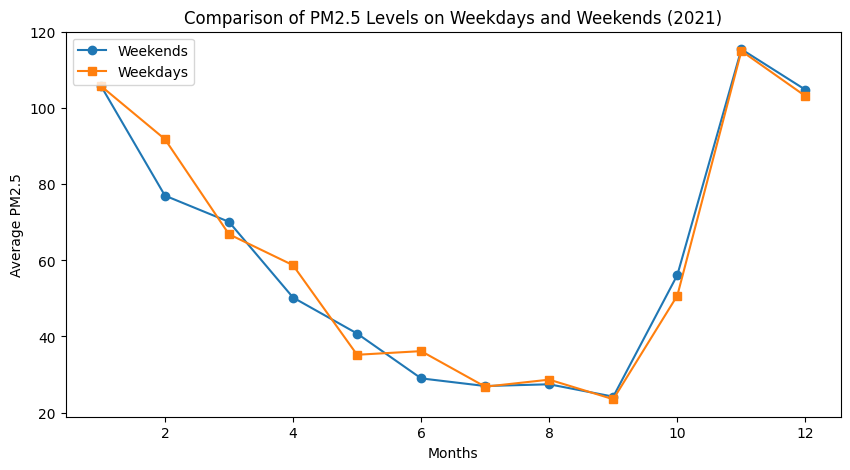

In [125]:
#3
data_2021 = data[data["Timestamp"].dt.year == 2021]
data_2021["Day"] = data_2021["Timestamp"].dt.dayofweek
data_2021["Weekend"] = data_2021["Day"].isin([5,6])
monthly_avg = data_2021.groupby([data_2021["Timestamp"].dt.month, "Weekend"])["PM2.5"].mean().unstack()

plt.figure(figsize=(10,5))
plt.plot(monthly_avg.index, monthly_avg[True], label="Weekends", marker='o')
plt.plot(monthly_avg.index, monthly_avg[False], label="Weekdays", marker='s')
plt.xlabel("Months")
plt.ylabel("Average PM2.5")
plt.title("Comparison of PM2.5 Levels on Weekdays and Weekends (2021)")
plt.legend()
plt.show()

__*Spatio-temporal aggregation:*__

In [126]:
#1
data_2022 = data[data["Timestamp"].dt.year == 2022]
summer_pm2_5 = data_2022[data_2022["Timestamp"].dt.month.isin([3,4,5])].groupby("state")["PM2.5"].mean()
monsoon_pm2_5 = data_2022[data_2022["Timestamp"].dt.month.isin([6,7,8,9])].groupby("state")["PM2.5"].mean()
change_pm2_5 = ((monsoon_pm2_5 - summer_pm2_5) / summer_pm2_5) * 100
most_diff_state = change_pm2_5.abs().idxmax()
print(f"State with most % change in PM2.5 (2022): {most_diff_state}")


State with most % change in PM2.5 (2022): Assam


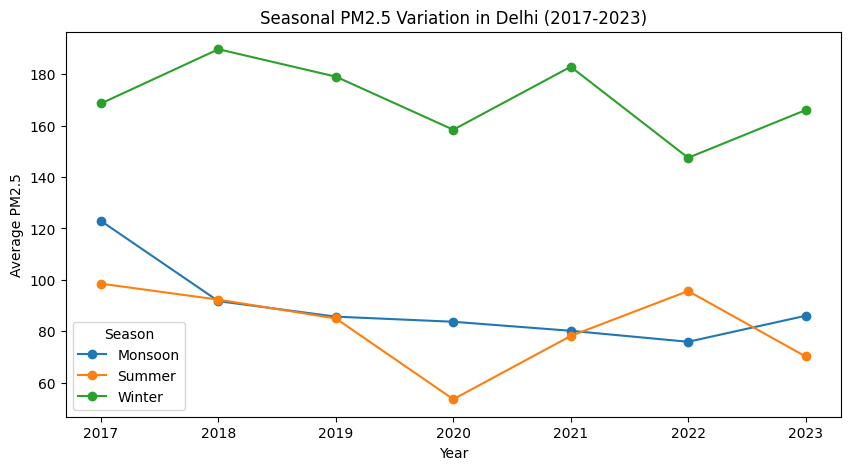

In [127]:
#2
delhi_data = data[(data["state"] == "Delhi") & (data["Timestamp"].dt.year.between(2017,2023))]
delhi_data["season"] = delhi_data["Timestamp"].dt.month.map(lambda x: "Winter" if x in [12,1,2] else "Summer" if x in [3,4,5] else "Monsoon")
seasonal_pm2_5 = delhi_data.groupby([data["Timestamp"].dt.year, "season"])["PM2.5"].mean().unstack()

seasonal_pm2_5.plot(kind="line", figsize=(10,5), marker="o")
plt.xlabel("Year")
plt.ylabel("Average PM2.5")
plt.title("Seasonal PM2.5 Variation in Delhi (2017-2023)")
plt.legend(title="Season")
plt.show()

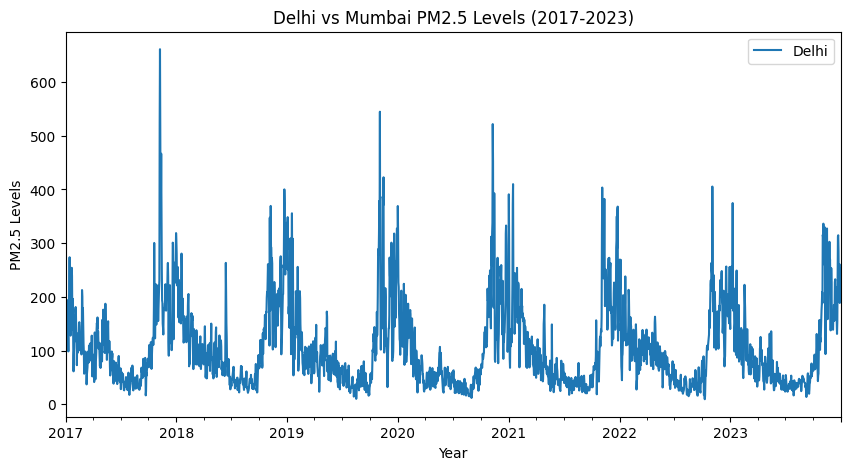

In [128]:
#3
delhi_mumbai = data[(data["state"].isin(["Delhi", "Mumbai"])) & (data["Timestamp"].dt.year.between(2017,2023))]
delhi_mumbai.groupby(["Timestamp", "state"])["PM2.5"].mean().unstack().plot(figsize=(10,5))
plt.xlabel("Year")
plt.ylabel("PM2.5 Levels")
plt.title("Delhi vs Mumbai PM2.5 Levels (2017-2023)")
plt.legend()
plt.show()

***Population Based:***

In [162]:
#1
data = pd.read_csv('Data.csv')
state_data = pd.read_csv('State_data.csv')
ncap_funding = pd.read_csv('NCAP_Funding.csv')
state_monitoring_stations = data.groupby('state')['station'].nunique().reset_index()
state_monitoring_stations.columns = ['State', 'Monitoring_Stations']
state_population = state_data[['State', 'Population']]
state_monitoring_stations = pd.merge(state_monitoring_stations, state_population, on='State')
state_monitoring_stations['Stations_per_Million'] = state_monitoring_stations['Monitoring_Stations'] / (state_monitoring_stations['Population'] / 1_000_000)
highest_stations_relative_to_population = state_monitoring_stations.sort_values(by='Stations_per_Million', ascending=False).iloc[0]
print("State with the highest number of monitoring stations relative to its population:")
print("")
print(highest_stations_relative_to_population)

State with the highest number of monitoring stations relative to its population:

State                   Chandigarh
Monitoring_Stations              3
Population                 1055450
Stations_per_Million       2.84239
Name: 4, dtype: object


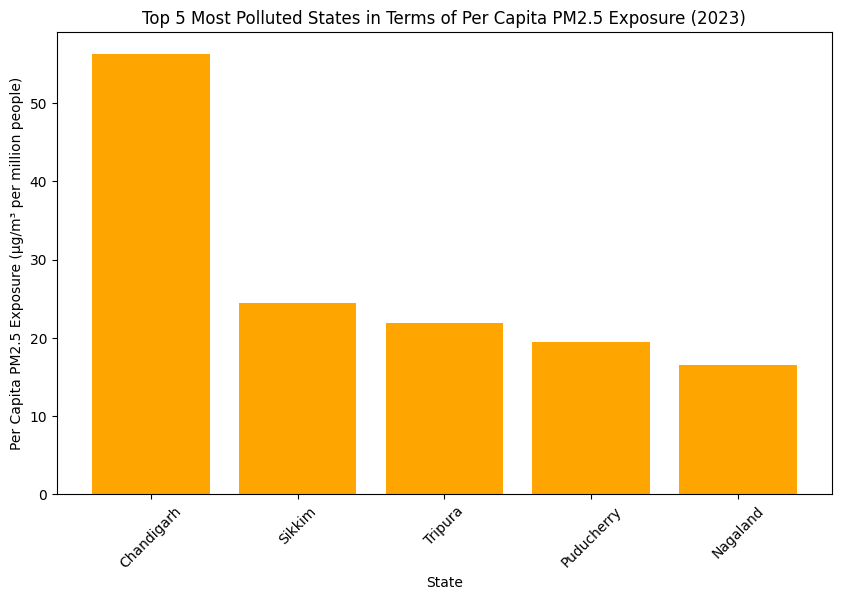

In [164]:
#2
data = pd.read_csv('Data.csv')
state_data = pd.read_csv('State_data.csv')
ncap_funding = pd.read_csv('NCAP_Funding.csv')
data['Timestamp'] = pd.to_datetime(data['Timestamp'], format='%Y-%m-%d')
data_2023 = data[data['Timestamp'].dt.year == 2023]
state_pm25_exposure = data_2023.groupby('state')['PM2.5'].mean().reset_index()
state_pm25_exposure.columns = ['State', 'Average_PM2.5']
state_pm25_exposure = pd.merge(state_pm25_exposure, state_population, on='State')
state_pm25_exposure['Per_Capita_PM2.5'] = state_pm25_exposure['Average_PM2.5'] / (state_pm25_exposure['Population'] / 1_000_000)
top_5_polluted_states = state_pm25_exposure.sort_values(by='Per_Capita_PM2.5', ascending=False).head(5)
plt.figure(figsize=(10, 6))
plt.bar(top_5_polluted_states['State'], top_5_polluted_states['Per_Capita_PM2.5'], color='orange')
plt.xlabel('State')
plt.ylabel('Per Capita PM2.5 Exposure (µg/m³ per million people)')
plt.title('Top 5 Most Polluted States in Terms of Per Capita PM2.5 Exposure (2023)')
plt.xticks(rotation=45)
plt.show()

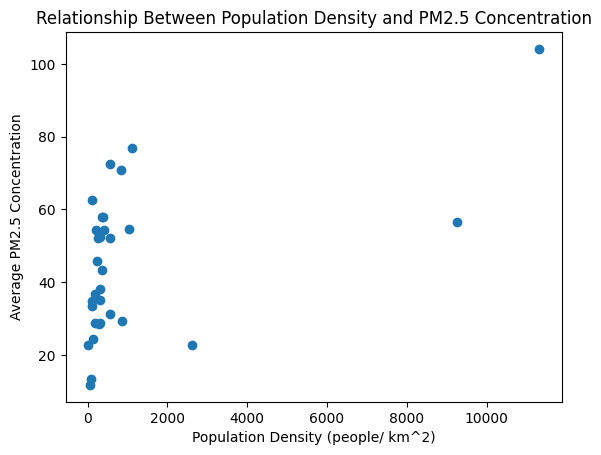

In [167]:
#3
d1 = pd.read_csv("Data.csv")
d2 = pd.read_csv("State_data.csv")
a = d1.groupby("state")["PM2.5"].mean().reset_index()
b = d2.groupby("State")["Population"].sum().reset_index()
c = d2.groupby("State")["Area (km2)"].sum().reset_index()
d = pd.merge(a, b, left_on = "state", right_on = "State")
d = pd.merge(d, c, on="State")
d["Population_density"] = d["Population"]/d["Area (km2)"]
d["Average_PM2.5_conc"] = d["PM2.5"]
plt.figure()
plt.scatter(d["Population_density"], d["Average_PM2.5_conc"])
plt.xlabel("Population Density (people/ km^2)")
plt.ylabel("Average PM2.5 Concentration")
plt.title("Relationship Between Population Density and PM2.5 Concentration")
plt.show()

***Area Based:***

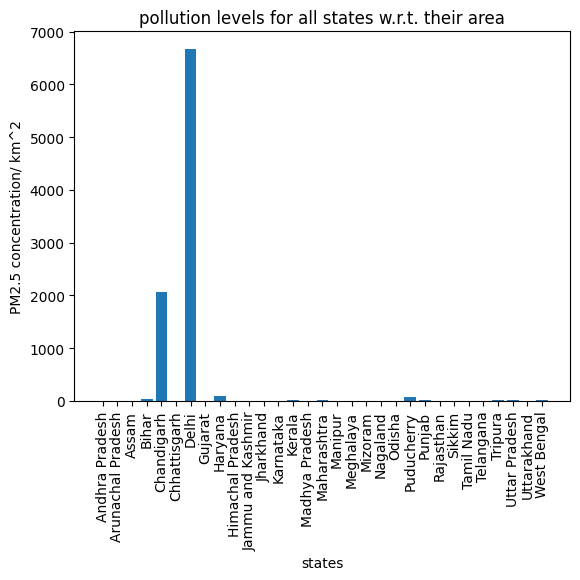

In [141]:
#1
d1 = pd.read_csv("Data.csv")
d2 = pd.read_csv("State_data.csv")
a = d1.groupby("state")["PM2.5"].sum().reset_index()
b = d2.groupby("State")["Area (km2)"].sum().reset_index()
c = pd.merge(a, b, left_on = "state", right_on = "State")
c["PM2.5 Conc per sq km"] = c["PM2.5"]/c["Area (km2)"]
plt.figure()
plt.bar(c["state"], c["PM2.5 Conc per sq km"])
plt.xlabel("states")
plt.xticks(rotation=90)
plt.ylabel("PM2.5 concentration/ km^2")
plt.title("pollution levels for all states w.r.t. their area")
plt.show()

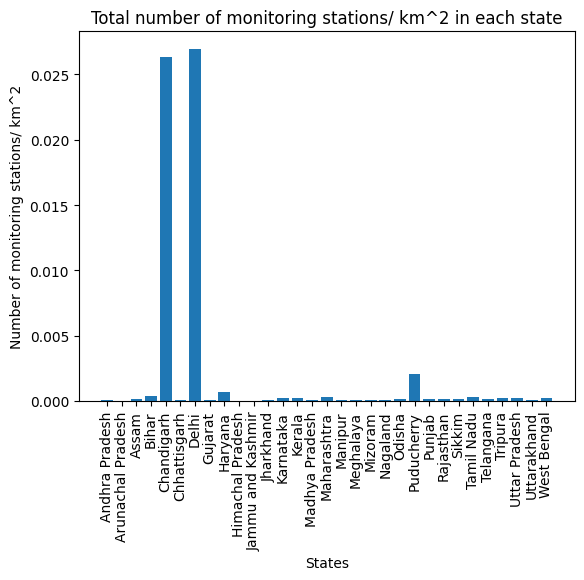

In [143]:
#2
d1 = pd.read_csv("Data.csv")
d2 = pd.read_csv("State_data.csv")
a = d1.groupby("state")["station"].nunique().reset_index()
b = d2.groupby("State")["Area (km2)"].sum().reset_index()
c = pd.merge(a, b, left_on = "state", right_on = "State")
c["Tot_stations_per_sq_km"] = c["station"]/c["Area (km2)"]
plt.figure()
plt.bar(c["state"], c["Tot_stations_per_sq_km"])
plt.xlabel("States")
plt.xticks(rotation = 90)
plt.ylabel("Number of monitoring stations/ km^2")
plt.title("Total number of monitoring stations/ km^2 in each state")
plt.show()

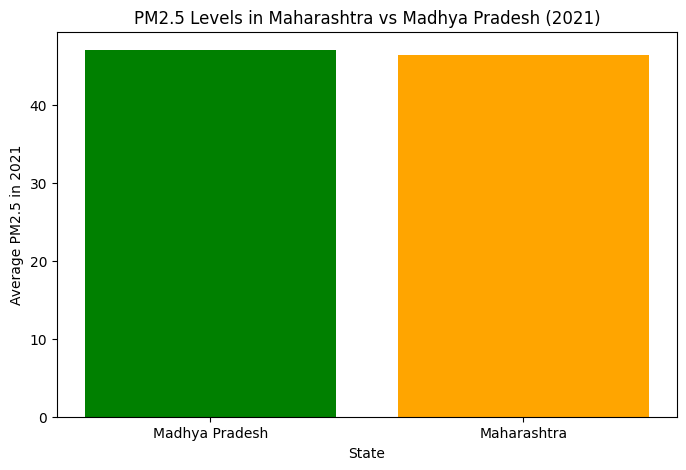

             state      PM2.5  Population_density
14  Madhya Pradesh  47.095952          235.608557
15     Maharashtra  46.440044          365.192023


In [157]:
#3
d1 = pd.read_csv("Data.csv")
d2 = pd.read_csv("State_data.csv")
d1["Timestamp"] = pd.to_datetime(d1["Timestamp"], format="%Y-%m-%d")
data_2021 = d1[d1["Timestamp"].dt.year == 2021]
a = data_2021.groupby("state")["PM2.5"].mean().reset_index()
b = d2.groupby("State")["Population"].sum().reset_index()
c = d2.groupby("State")["Area (km2)"].sum().reset_index()
d = pd.merge(a, b, left_on = "state", right_on = "State")
d = pd.merge(d, c, on="State")
d["Population_density"] = d["Population"]/d["Area (km2)"]
wanted = ["Maharashtra", "Madhya Pradesh"]
e = d[d["State"].isin(wanted)]  # Use column name "State", not "state"
plt.figure(figsize=(8,5))
plt.bar(e["State"], e["PM2.5"], color=["green", "orange"])
plt.xlabel("State")
plt.ylabel("Average PM2.5 in 2021")
plt.title("PM2.5 Levels in Maharashtra vs Madhya Pradesh (2021)")
plt.show()
print(e[["state", "PM2.5", "Population_density"]])

***Funding Based:***

In [129]:
#1
funding_column = "Amount released during FY 2021-22"
ncap_funding = ncap_funding[ncap_funding[funding_column].astype(str) != "-"]
funded_states = set(ncap_funding["State"])
data["received_funding"] = data["state"].isin(funded_states)
avg_pm25_funded = data[data["received_funding"] == True]["PM2.5"].mean()
avg_pm25_non_funded = data[data["received_funding"] == False]["PM2.5"].mean()
print(f"Average PM2.5 Level (Funded States): {avg_pm25_funded:.2f}")
print(f"Average PM2.5 Level (Non-Funded States): {avg_pm25_non_funded:.2f}")

Average PM2.5 Level (Funded States): 62.07
Average PM2.5 Level (Non-Funded States): 52.87


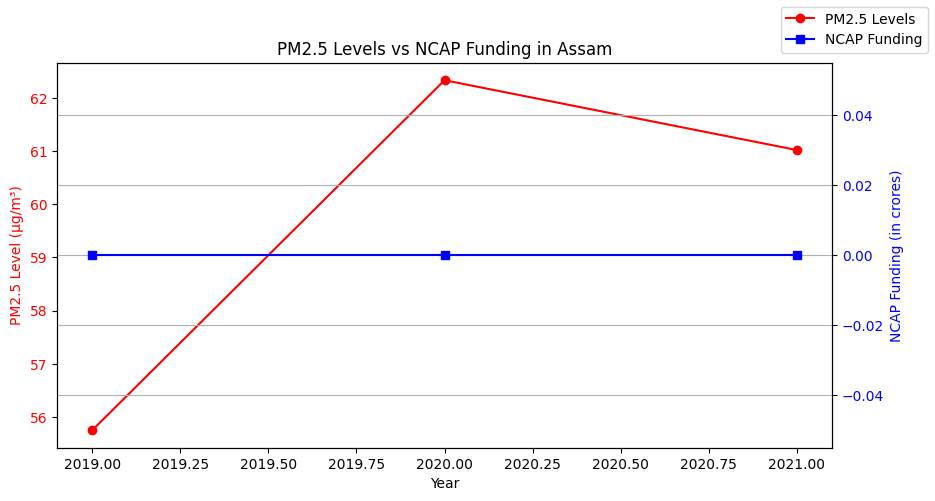

In [130]:
#2
data["Year"] = data["Timestamp"].dt.year
pm25_assam = data[data["state"] == "Assam"].groupby("Year")["PM2.5"].mean().reset_index()
ncap_assam = ncap_funding[ncap_funding["State"] == "Assam"]
funding_data = pd.DataFrame({
    "Year": [2019, 2020, 2021],
    "Funding": [
        ncap_assam["Amount released during FY 2019-20"].values[0] if not ncap_assam.empty else 0,
        ncap_assam["Amount released during FY 2020-21"].values[0] if not ncap_assam.empty else 0,
        ncap_assam["Amount released during FY 2021-22"].values[0] if not ncap_assam.empty else 0
    ]
})
merged_df = pd.merge(pm25_assam, funding_data, on="Year", how="inner")
fig, ax1 = plt.subplots(figsize=(10, 5))
ax1.plot(merged_df["Year"], merged_df["PM2.5"], color="red", marker="o", label="PM2.5 Levels")
ax1.set_xlabel("Year")
ax1.set_ylabel("PM2.5 Level (µg/m³)", color="red")
ax1.tick_params(axis="y", labelcolor="red")
ax2 = ax1.twinx()
ax2.plot(merged_df["Year"], merged_df["Funding"], color="blue", marker="s", label="NCAP Funding")
ax2.set_ylabel("NCAP Funding (in crores)", color="blue")
ax2.tick_params(axis="y", labelcolor="blue")
plt.title("PM2.5 Levels vs NCAP Funding in Assam")
fig.legend(loc="upper right")
plt.grid()
plt.show()

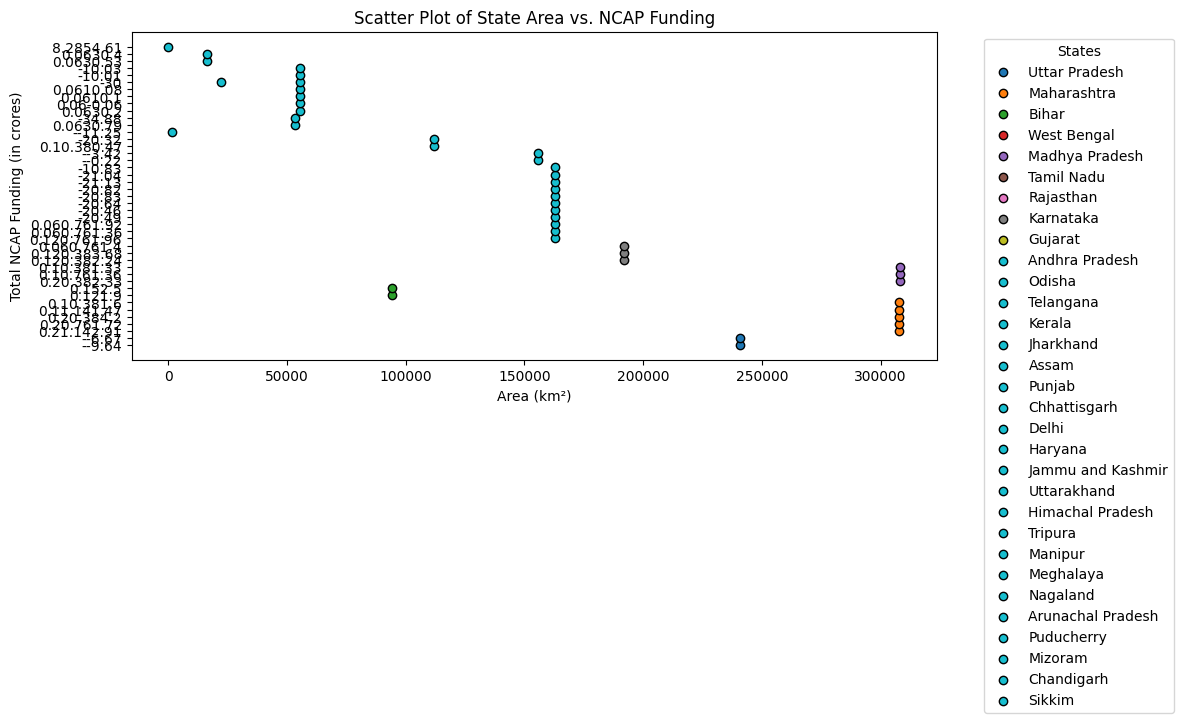

In [131]:
#3
state_data.rename(columns={"Area (km2)": "Area"}, inplace=True)
ncap_funding["Total_Funding"] = (
    ncap_funding["Amount released during FY 2019-20"].fillna(0) +
    ncap_funding["Amount released during FY 2020-21"].fillna(0) +
    ncap_funding["Amount released during FY 2021-22"].fillna(0)
)

merged_df = state_data.merge(ncap_funding, on="State", how="left")

states = merged_df["State"].unique()
colors = plt.cm.tab10(range(len(states)))
state_color_map = {state: colors[i] for i, state in enumerate(states)}

plt.figure(figsize=(12, 6))

for state in states:
    subset = merged_df[merged_df["State"] == state]
    plt.scatter(subset["Area"], subset["Total_Funding"], color=state_color_map[state], label=state, edgecolors="black")

plt.xlabel("Area (km²)")
plt.ylabel("Total NCAP Funding (in crores)")
plt.title("Scatter Plot of State Area vs. NCAP Funding")
plt.legend(title="States", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

***Miscellaneous Questions:***

In [132]:
#1
data_2023 = data[data["Timestamp"].dt.year == 2023]
# Find the most polluted city in 2023
most_polluted_city = data_2023.groupby("city")["PM2.5"].mean().idxmax()
# Calculate percentage of hazardous days (PM2.5 > 300)
hazardous_days = data_2023[(data_2023["city"] == most_polluted_city) & (data_2023["PM2.5"] > 300)].shape[0]
total_days = data_2023[data_2023["city"] == most_polluted_city]["Timestamp"].nunique()
percentage_hazardous = (hazardous_days / total_days) * 100
print(f"Most polluted city in 2023: {most_polluted_city}")
print(f"Percentage of hazardous days: {percentage_hazardous:.2f}%")

Most polluted city in 2023: Darbhanga
Percentage of hazardous days: 0.82%


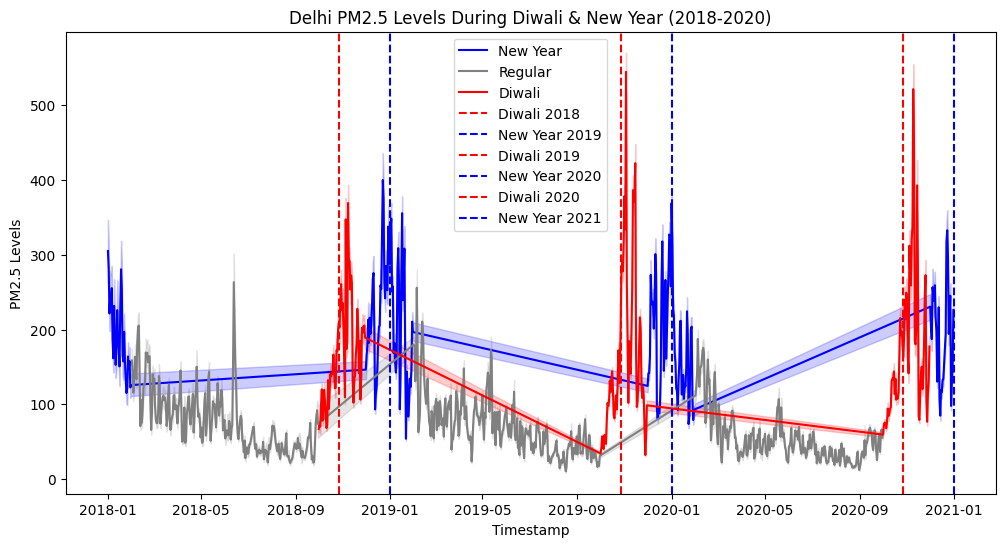

In [133]:
#2
delhi_data = data[(data["state"] == "Delhi") & (data["Timestamp"].dt.year.between(2018, 2020))]
# Mark festival months
delhi_data["Festival"] = delhi_data["Timestamp"].dt.month.map(lambda x: "Diwali" if x in [10, 11] else "New Year" if x in [12, 1] else "Regular")
# Plot PM2.5 levels
plt.figure(figsize=(12,6))
sns.lineplot(x=delhi_data["Timestamp"], y=delhi_data["PM2.5"], hue=delhi_data["Festival"], palette={"Diwali": "red", "New Year": "blue", "Regular": "gray"})
# Mark festival spikes with vertical lines
for year in [2018, 2019, 2020]:
    plt.axvline(pd.to_datetime(f"{year}-10-27"), color="red", linestyle="--", label=f"Diwali {year}")
    plt.axvline(pd.to_datetime(f"{year+1}-01-01"), color="blue", linestyle="--", label=f"New Year {year+1}")
plt.xlabel("Timestamp")
plt.ylabel("PM2.5 Levels")
plt.title("Delhi PM2.5 Levels During Diwali & New Year (2018-2020)")
plt.legend()
plt.show()

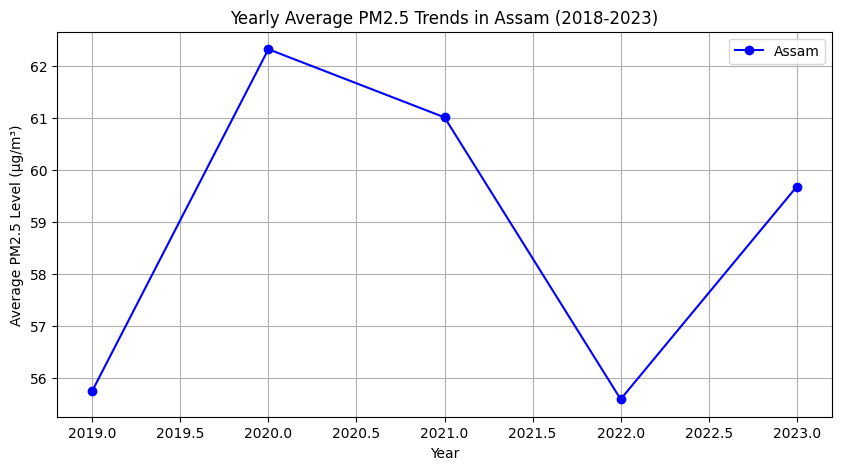

In [174]:
#3
funding_df = pd.read_csv("NCAP_Funding.csv")
pm25_df = pd.read_csv("data.csv")
highest_funded_state = funding_df.loc[
    funding_df["Amount released during FY 2020-21"].idxmax(), "State"]
pm25_df["Timestamp"] = pd.to_datetime(pm25_df["Timestamp"])
pm25_df["Year"] = pm25_df["Timestamp"].dt.year
state_pm25 = pm25_df[pm25_df["state"] == highest_funded_state]
yearly_avg_pm25 = state_pm25.groupby("Year")["PM2.5"].mean().reset_index()
yearly_avg_pm25 = yearly_avg_pm25[(yearly_avg_pm25["Year"] >= 2018) & (yearly_avg_pm25["Year"] <= 2023)]
plt.figure(figsize=(10, 5))
plt.plot(yearly_avg_pm25["Year"], yearly_avg_pm25["PM2.5"], marker="o", linestyle="-", color="blue", label=highest_funded_state)
plt.xlabel("Year")
plt.ylabel("Average PM2.5 Level (µg/m³)")
plt.title(f"Yearly Average PM2.5 Trends in {highest_funded_state} (2018-2023)")
plt.grid()
plt.legend()
plt.show()

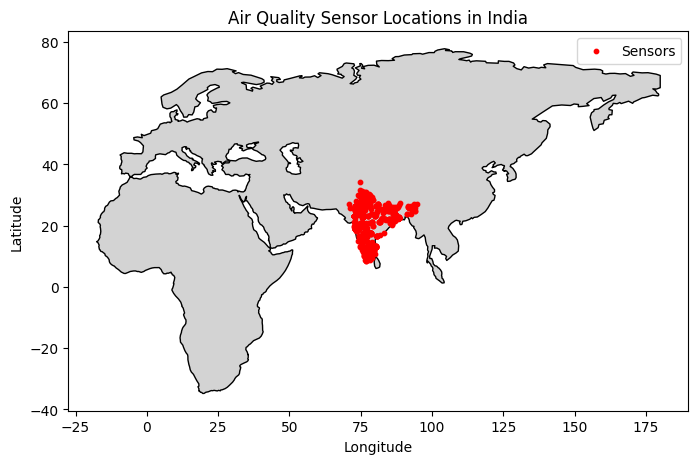

In [190]:
#4
import geopandas as gpd
import geodatasets
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv("Data.csv")
data.columns = data.columns.str.strip().str.lower()
if "latitude" not in data.columns or "longitude" not in data.columns:
    raise KeyError("Latitude and Longitude columns not found in Data.csv")
sensor_locations = data[["latitude", "longitude"]].dropna().drop_duplicates()
world = gpd.read_file(geodatasets.get_path("naturalearth.land"))
india = india.cx[68:98, 6:38]
fig, ax = plt.subplots(figsize=(8,6))
india.plot(ax=ax, color="lightgray", edgecolor="black")
plt.scatter(sensor_locations["longitude"], sensor_locations["latitude"], color="red", s=10, label="Sensors")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Air Quality Sensor Locations in India")
plt.legend()
plt.show()

***Tell us somethinhg new:***

1.Visualizing population density against PM2.5 levels can help identify areas with high pollution and high population density, indicating regions that require urgent intervention.

2.The data from 2019-2020 can highlight the drastic reduction in pollution levels during the COVID-19 lockdowns. This reduction can be used to infer the major sources of pollution by comparing pre-lockdown, lockdown, and post-lockdown pollution levels.

3. By comparing states that received NCAP funding with those that did not, the data can show how effective funding and policy implementation are in reducing pollution

4.The data can show spikes in pollution levels during festivals like Diwali (due to firecrackers) and other major celebrations.
Comparing pollution levels between industrial states (e.g., Gujarat, Maharashtra) and non-industrial states can highlight the impact of industrial activity on air quality.